### Final Revised Data Product; Author:Amrita Sharma; Date: 6/1/2018

The document contains of revised and redesigned version of some of the chosen datasets from the article https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts. 4 datasets are chosen out of which 2 datasets are used for redesigning and also for creating the deceptive version. And the other two datasets are used for redesigning and deceptive version each.The notebook is divided in 2 parts. Part 1 consists of the redesigned version of the data product and Part 2 consists of deceptive version of the data product. The notebook is structured in the following way for each part:


<li>Claim</li>
<li>Dataset Reference</li>
<li>Comparison between Original and First</li>
<li>Critique</li>
<li>Making Of</li>
<li>Final Revised</li>
<li>Explanation</li>
<li>Comparison between Original and Final</li>

Loading all the required packages

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from IPython.display import display, HTML

Populating the interactive namespace from numpy and matplotlib


<a id='Part 1'></a>
### Part 1: Redesign Data Product

<a id='1.1Claim'></a>
#### 1.1 Claim: America has six times as many firearm homicides as Canada, and nearly 16 times as many as Germany 
<a id='1.1Dataset Ref'></a>
Dataset - https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list 

#### 1.1 Comparison between Original Visualization and Earlier Version<a id='1.1Comparison'></a>

In [195]:
display(HTML("<table><tr><td><img src='gun_homicides_per_capita.jpg'></td><td><img src='HomicidePerFireArm.jpg'></td></tr></table>"))

,


#### 1.1 Critique
<a id='1.1Critique'></a>
The above redesign version of the data product does deliver the message required by the claim that is America has six times as many firearm homicides as Canada, and nearly 16 times as many as Germany. Based on the context of the user that contributes educated people it is difficult to convey the message across clearly because of two reasons. 

First, the use of one color in the redesigned version for every country doesn't explain the gravity of the situation when compared to actual version (i.e. use of green color for all other countries and red color for US). And second, the use of human figures to represent the data points shows the consequence of the argument which qualifies the argument further. The original version qualifies the argument however the redesigned version simply represents facts which doesn't compels the audience to take a decision.

#### 1.1 Making of Redesign <a id='1.1Making Of'></a>

Loading the Dataset

In [103]:
homi = pd.read_excel("World firearms murders and ownership_SurveyData_2nd.xlsx")

Dropping all the NA and cleaning the datasets

In [104]:
homi.dropna()[:2]

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0


Multiplying the homicide data with 10 to scale up the comparison on the base of 1 million people

In [105]:
homi['Homicide'] = homi['Homicide by firearm rate per 100,000 pop']*10

Sorting the dataset by homicide

In [106]:
homisort = homi.sort_values(by = 'Homicide', ascending = False)

In [107]:
homi1 = homisort.dropna()

In [108]:
homi1.loc[~(homi1==0).all(axis=1)].head(2)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Homicide
72,Honduras,HN,National police/OCAVI,83.4,5201.0,68.43,88.0,6.2,500000.0,684.3
51,El Salvador,SV,CTS/OCAVI,76.9,2446.0,39.90,92.0,5.8,400000.0,399.0


Choosing data for only developed countries

In [109]:
homidf = homi1[(homi1['Country/Territory'] == 'Austria') | (homi1['Country/Territory'] == 'Denmark') | (homi1['Country/Territory'] == 'Netherlands') |
      (homi1['Country/Territory'] == 'Sweden') |(homi1['Country/Territory'] == 'Finalnd') |(homi1['Country/Territory'] == 'Ireland') |
     (homi1['Country/Territory'] == 'Canada')|(homi1['Country/Territory'] == 'Australia')| (homi1['Country/Territory'] == 'New Zealand')|
        (homi1['Country/Territory'] == 'Germany')|(homi1['Country/Territory'] == 'Luxembourg')| (homi1['Country/Territory'] == 'Belgium')|
     (homi1['Country/Territory'] == 'Swizerland')|(homi1['Country/Territory'] == 'United States') ]

Choosing only those variables which are required for the data visualization

In [110]:
homiFinal = homidf[['Country/Territory','Average firearms per 100 people','Homicide']]

In [111]:
homiFinal.head(2)

,Country/Territory,Average firearms per 100 people,Homicide
176,United States,88.8,29.7
14,Belgium,17.2,6.8


In [112]:
newhomi = homiFinal.melt('Country/Territory',var_name='cols', value_name = 'vals')

In [113]:
newhomi.head(3)

,Country/Territory,cols,vals
0,United States,Average firearms per 100 people,88.8
1,Belgium,Average firearms per 100 people,17.2
2,Luxembourg,Average firearms per 100 people,15.3


#### 1.1 Final Revised Redesigned <a id='1.1Final Revised'></a>

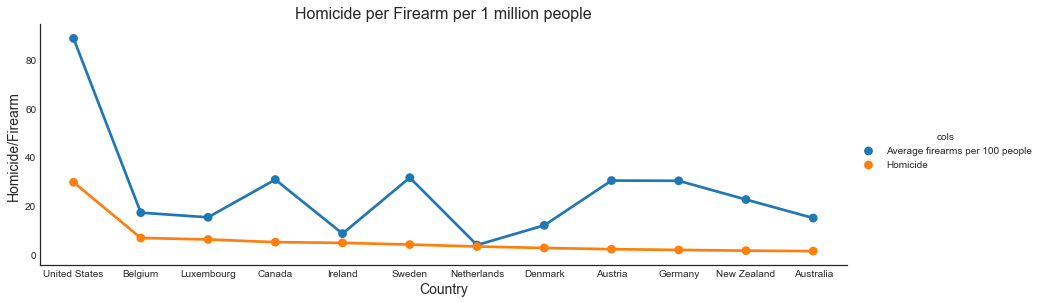

In [114]:
sns.factorplot(x = 'Country/Territory', y='vals', hue = 'cols', data= newhomi, aspect = 3)
plt.ylabel('Homicide/Firearm', fontsize = 14)
plt.xlabel('Country', fontsize = 14)
plt.title('Homicide per Firearm per 1 million people',fontsize=16)

#### 1.1 Explanation <a id='1.1Explanation'></a>
The above revised graph is a better version of the original version and the earlier redesigned version because of two reasons.

First, the visualization qualifies the graph by showing even the Average firearm per 100 people plotted on the same graph since that is the underlying qualifier of the argument. The article clearly states that US is an outlier on gun violence because it has way more guns than other developed nations. Hence by the above graph it not only qualifies the argument further but it also gives the reason of the argument which is more guns leads to more homicide per firearm per 100 people.

By looking at the above graph the audience are compelled to take a decision since it provides more evidence in terms of Firearm data to strengthen the claim sated above.

In [196]:
display(HTML("<table><tr><td><img src='gun_homicides_per_capita.jpg'></td><td><img src='FinalHomicide.jpg'></td></tr></table>"))

,


#### 1.1 Comparison: <a id='1.1Final Comparison'></a>
Brief comparison between original version and redesigned version include this point "The US is an outlier on gun violence because it has way more guns than other developed nations." Hence along with the facts and qualifier it also gives why US is an outlier in Gun violence because it has more guns. 

Also the orginial homicide value is a ratio how many homicide per firearm per people and other value is how many people actually own firearm. A direct comparison of both qualifies the stated argument further and compels the audience to take a decision which is the purpose of the graph.

#### 1.2 Claim: On average, there is around one mass shooting for each day in America<a id='1.2Claim'></a>

<a id='1.2Dataset Ref'></a>
Dataset Reference - http://www.gunviolencearchive.org/reports/mass-shootings/2015

<a id='1.2Comparison'></a>
#### 1.2 Comparison between Original Visualization and Earlier Version

In [197]:
display(HTML("<table><tr><td><img src='mass_shooting_calendar.png'></td><td><img src='MassShooting.jpg'></td></tr></table>"))

,


<a id='1.2Critique'></a>
#### 1.2 Critique
The above claim states that ' On average, there is around one mass shooting for each day in America' which is clearly not stated by the redesigned version. There are many points of concern in the above redesigned version. 

First, the argument states facts about the daily mass shooting in America which is not represented by the above version. Second, the use of colors is absolutely pointless because it neither shows category not attributes. Because of the stated concerns the audience can't comprehend the intended meaning and hence can neither take any valuable decision based on this graph nor understand the stated facts.The use of bar charts gives a haphazard view of the trend. Hence the above chart can be redesigned with the above points in mind.

<a id='1.2Making Of'></a>
#### 1.2 Making Of Redesign

Loading the Dataset

In [117]:
remass = pd.read_csv("2015_Mass Shooting Tracker_1st.csv")

In [118]:
remass.head(2)

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN


Data Cleaning

In [119]:
remass.drop(labels=['Operations'],inplace=True,axis=1)

In [22]:
remass.head(2)

,Incident Date,State,City Or County,Address,# Killed,# Injured
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4


Find out the total Mass Shooting

In [120]:
remass['Mass_shooting'] = remass['# Killed'] + remass['# Injured']

Sort Values by Incident Date

In [121]:
mass = remass.sort_values(by=['Incident Date'])

In [122]:
mass.head(2)

,Incident Date,State,City Or County,Address,# Killed,# Injured,Mass_shooting
265,"April 16, 2015",Arizona,Phoenix,4300 block of East Anderson Drive,5,0,5
262,"April 18, 2015",North Carolina,Lumberton,Martin Luther King Drive,1,3,4


In [123]:
mass.rename(columns = {'# Killed':'Killed', '# Injured':'Injured'}, inplace = True)

In [124]:
mass.head(2)

,Incident Date,State,City Or County,Address,Killed,Injured,Mass_shooting
265,"April 16, 2015",Arizona,Phoenix,4300 block of East Anderson Drive,5,0,5
262,"April 18, 2015",North Carolina,Lumberton,Martin Luther King Drive,1,3,4


Choosing only the required columns

In [125]:
ms = mass[['Incident Date','Mass_shooting']]

In [126]:
ms['Months'] = pd.to_datetime(ms['Incident Date'])

In [127]:
ms.head(2)

,Incident Date,Mass_shooting,Months
265,"April 16, 2015",5,2015-04-16
262,"April 18, 2015",4,2015-04-18


Data Wrangling for Displaying Time Series Data

In [128]:
ms.index = ms['Months']
del ms['Incident Date']
del ms['Months']

In [129]:
ms.head(2)

,Mass_shooting
Months,
2015-04-16,5
2015-04-18,4


Including only the required columns

In [130]:
kill = mass[['Killed','Incident Date']]

In [131]:
kill['Months'] = pd.to_datetime(kill['Incident Date'])

Data Wrangling for displaying time series data

In [132]:
kill.index = kill['Months']
del kill['Incident Date']
del kill['Months']

In [133]:
kill.head(2)

,Killed
Months,
2015-04-16,5
2015-04-18,1


Setting the Figure Size

In [134]:
import matplotlib
matplotlib.rc('figure', figsize=(12, 6))

<a id='1.2Final Revised'></a>
#### 1.2.Final Redesigned Revised

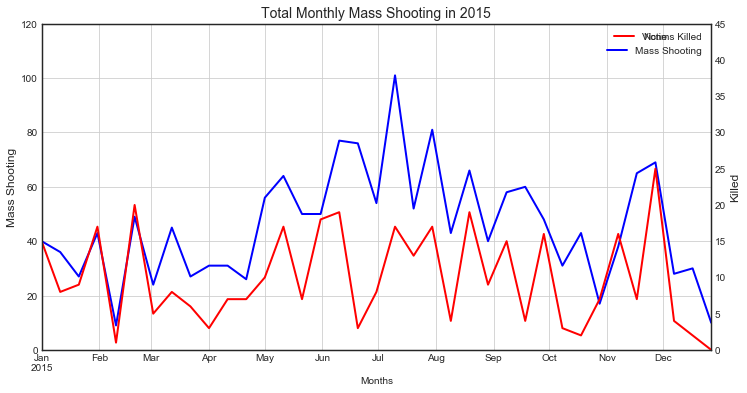

In [135]:
sns.set_style("white")
dff = ms['Mass_shooting'].resample('10D').sum()
dff.name="Mass Shooting"
dff.plot(color='blue', grid=True, linewidth = 2)
plt.legend(loc='upper left')
plt.ylim(0,120)
plt.ylabel('Mass Shooting',fontsize = 12)


dff = kill['Killed'].resample('10D').sum()
dff.name="Victims Killed"
dff.plot(color='red',grid=True, secondary_y=True, linewidth = 2)
plt.legend(loc='upper right')
plt.ylabel('Killed', fontsize = 12)
plt.ylim(0,45)
plt.title('Total Monthly Mass Shooting in 2015', fontsize = 14)
plt.xlabel('Months', fontsize = 12)
plt.show()

<a id='1.2Explanation'></a>
#### 1.2 Explanation
The above graph qualifies the underlying argument that is America has around one mass shooting a day because of three reasons.

First, the above shows monthly mass shooting per days data for the Year 2015 along with the impact of mass shooting i.e. victims killed data. Second, the graph shows the time series data which gives the underlying message that on an average there are mass shooting almost every day that strengthens our argument. Third, the use of red color for killing data conveys a deeper meaning and impacts the audience in a compelling way to take a decision as soon as possible.

The above graph gives an overview of mass shootings and number of people killed in Us in the year 2015 which to give an entire overview to support the claim America has around one mass shooting a day. Since lawmakers will be forced to wait for a time when there isn’t a mass shooting to talk gun control, they could find themselves waiting for a very long time hence the above visualization compels the audience to look at the mass shooting in the nutshell in the context of the main article.

In [198]:
display(HTML("<table><tr><td><img src='mass_shooting_calendar.png'></td><td><img src='MassRedesign.jpg'></td></tr></table>"))

,


<a id='1.2Final Comparison'></a>
#### 1.2 Comparison:
The orginial graph shows a calendar view of the mass shooting with a lot of days shown as empty however the above revised version shows a time series data with a lot of spikes which gives a view of trend in the first glance.

The use of color scheme conveys an extremely urgent message which shows the reason as well as impact of issue i.e. gun violence at hand. The reason why victims killed information is included to show the impact of these killings hence the above revised version not only qualifies the argument but also strengthens it.  

The revised graph also bridges the gap where there were no mass shootings or killings potrayed in the month of December above because of the way data is wrangled. Thus potraying a better story to the audience than the original version.

<a id='1.3Claim'></a>
<a id='1.3Dataset Ref'></a>
#### 1.3 Claim: The states with the most guns report the most suicides

Dataset Reference:https://www.nejm.org/doi/full/10.1056/NEJMp0805923 

<a id='1.3Comparison'></a>
#### 1.3 Comparison between Original Visualization and Earlier Version

In [199]:
display(HTML("<table><tr><td><img src='OriginalGun.jpg'></td><td><img src='GunOwnership.jpg'></td></tr></table>"))

,


<a id='1.3Critique'></a>
#### 1.3 Critique
The above redesigned version doesn't capture or qualifies the stated claim "more guns more suicides" because of two reasons.

First, it is difficult to make comparison between firearm suicides and non-firearm suicides. Because of that the above visualization becomes difficult to comprehend. Second, because of the stacked bar format of the graph the underlying message conveyed is not supporting the claim. Hence the above graph is revised based on the discussed points.

<a id='1.3Making Of'></a>
#### 1.3 Making of Redesign

Loading the dataset

In [138]:
guno = pd.read_excel("GunOwnership_Data.xlsx")

In [139]:
guno.head(2)

,Variable,States with the Highest Rates of Gun Ownership,States with the Lowest Rates of Gun Ownership,Ratio of Mortality Rates
0,Person-years,195 million,200 million,NaN
1,Percent of households with guns,47,15,NaN


Aggregating data for appropriate data visualization

In [140]:
gungrp = guno.groupby(['Variable']).agg(
    {'States with the Highest Rates of Gun Ownership':'sum','States with the Lowest Rates of Gun Ownership':'sum'})

Data Cleaning

In [141]:
gun2 =  gungrp.dropna()

In [142]:
gunfinal = gun2[:2]

In [143]:
gunfinal

,States with the Lowest Rates of Gun Ownership,States with the Highest Rates of Gun Ownership
Variable,,
No of firearm suicides,4257,16577
No of nonfirearm suicides,9259,9172


Resetting the index for Data Visualization

In [144]:
gun1 = gunfinal.reset_index()

In [145]:
gun1.head(2)

,Variable,States with the Lowest Rates of Gun Ownership,States with the Highest Rates of Gun Ownership
0,No of firearm suicides,4257,16577
1,No of nonfirearm suicides,9259,9172


Data Wrangling for Data Visualization

In [146]:
gun2 = gun1.melt('Variable',var_name='cols', value_name = 'vals')

In [147]:
gun2.head(2)

,Variable,cols,vals
0,No of firearm suicides,States with the Lowest Rates of Gun Ownership,4257
1,No of nonfirearm suicides,States with the Lowest Rates of Gun Ownership,9259


<a id='1.3Final Revised'></a>
#### 1.3 Final Revised Redesign

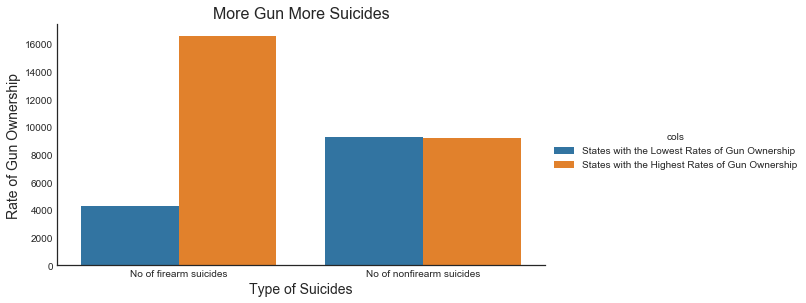

In [148]:
sns.factorplot(x = 'Variable', y='vals', hue = 'cols', data= gun2, kind = 'bar', aspect = 2)
plt.ylabel('Rate of Gun Ownership', fontsize = 14)
plt.xlabel('Type of Suicides', fontsize = 14)
plt.title('More Gun More Suicides',fontsize=16)

<a id='1.3Explanation'></a>
#### 1.3 Explanation
The above graph qualifies the claim "more gun more suicides" because of two main reasons.

First, the bar format of the chart appropriately indicates that high gun ownership has high number of firearm suicides.
Second, the graph persuades the audience to take the intended decision because it is easily comprehensible and tells the exact story required by the above stated claim.

The graph compels the audience to take a decision because of the nature of the graph representation. It potrays evidence in the light of the reported suicides between 2001 and 2005 in states with the highest and lowest rates of gun ownership thus making the above version an improved  redesigned verison of the earlier version.

In [200]:
display(HTML("<table><tr><td><img src='OriginalGun.jpg'></td><td><img src='gunRedesign.jpg'></td></tr></table>"))

,


<a id='1.3Final Comparison'></a>
#### 1.3 Comparison:
The states claim "More Guns, more suicides" is qualified clearly with the newer version with only 1 high bar chart which represents highest gun ownership leads to higher firearm suicides. 

The fact stated in the above revised version of the plot is absolutely necessary to persuade the audience to take the appropriate decision and sense a matter of urgency. When compared with the original version the revised verison is more easy to comprehend because of data wrangling and representation.

A very interesting insight was when you closely compare the two visualization irrespective of the nature of bar chart the above two charts potray a very different picture of data on suicide between lowest and highest suicide rates.

<a id='Part 2'></a>
## Part 2: Deceptive Data Product

<a id='2.1Claim'></a>
#### 2.1 Claim : America has six times as many firearm homicides as Canada, and nearly 16 times as many as Germany
<a id='2.1Dataset Ref'></a>
Dataset - https://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list 

<a id='2.1Comparison'></a>
#### 2.1 Comparison between Original Visualization and Earlier Version

In [201]:
display(HTML("<table><tr><td><img src='gun_homicides_per_capita.jpg'></td><td><img src='DecepHomicide1.jpg'></td></tr></table>"))

,


<a id='2.1Critique'></a>
#### 2.1 Critique: 
The above deceptive version is not deceptive because it still portrays that US is an outlier in Gun violence because of the number of guns per firearm per 1 million people. 

The basic representation of pie-chart doesn't depict a deceptive version because it doesn't compare two graphs, etc. It basically potrays exactly the same information as depicted by the original version and qualifies the claim accordingly. Hence the above deceptive visualization can be revised based on the discussed facts.

<a id='2.1Making Of'></a>
#### 2.1 Making of Deceptive Version

Using the same datset used for the 1. Making of Redesigned version above. Since the two data sets are same the above wrangled data could be used for the reproducing the deceptive version of the graph.

In [151]:
homi1.head(2)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Homicide
72,Honduras,HN,National police/OCAVI,83.4,5201.0,68.43,88.0,6.2,500000.0,684.3
51,El Salvador,SV,CTS/OCAVI,76.9,2446.0,39.90,92.0,5.8,400000.0,399.0


As you can see the above used data doesn't consist of data of only developed countries. Hence used a range of homicide data to create a deceptive effect

In [152]:
homicide = homi1[(homi1['Homicide'] < 32) & (homi1['Homicide'] > 7)]

In [153]:
len(homicide)

22

There are 22 countries considered for the deceptive visualization

<a id='2.1Final Revised'></a>
#### 2.1 Final Revised Deceptive

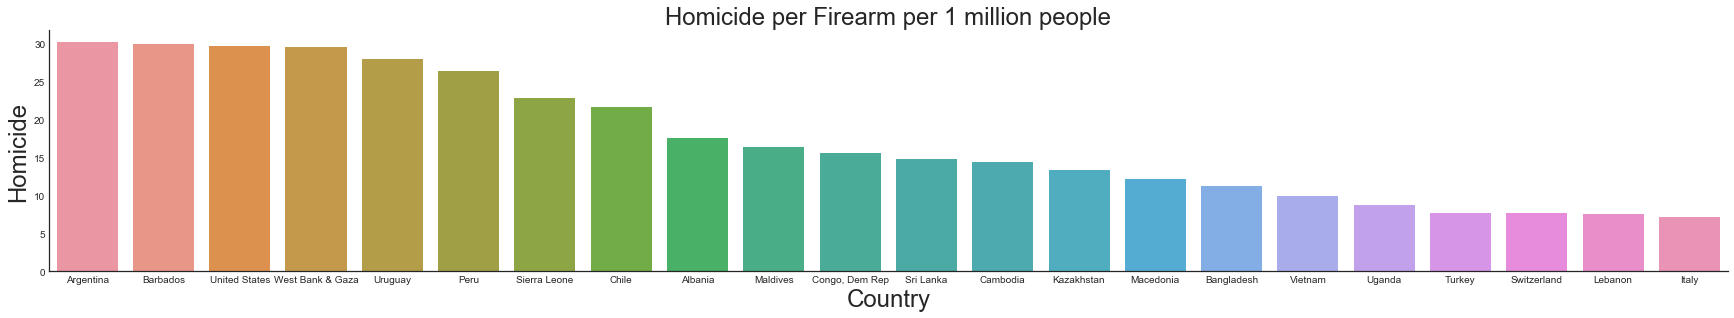

In [154]:
sns.factorplot(x = 'Country/Territory', y= 'Homicide' ,kind = 'bar',data = homicide, aspect = 6)
plt.ylabel('Homicide', fontsize = 24)
plt.xlabel('Country', fontsize = 24)
plt.title('Homicide per Firearm per 1 million people',fontsize=24)

<a id='2.1Explanation'></a>
#### 2.1 Explanation:
The above revised version is a deceptive version of the data product because of two main reasons. 

First, only developed countries are not considered here because this indicates that US is not an outlier there are other countries which have a higher homicide per firearm per 1 million people. Thus, the basic argument is weakened here since US is not an outlier any more.

Second, because of the bar format of the chart the visualization becomes easy to comprehend and compels the audience to take an exactly opposite view point which serves the purpose of the deceptive visualization.

In [202]:
display(HTML("<table><tr><td><img src='gun_homicides_per_capita.jpg'></td><td><img src='HomicideDec.jpg'></td></tr></table>"))

,


<a id='2.1Final Comparison'></a>
#### 2.1 Comparison:
When we compare the original data visualization with the deceptive version the two are exactly opposite. The original data product qualifies the claim that US is an outlier by showing Homicide per Firearm per 1 million people statistics whereas the deceptive version whows exactly the opposite of the intended message.

The use of Homicide data creates the intended deception to potray exactly the opposite of the stated claim and thus makes the deceptive version of the original data product much better than the earlier revised verison. The result would be that the audience views the Homicide of the displayed Countries and views US amongst one of the high Homicide per Firearm per 1 million people and not an outlier.

<a id='2.2Claim'></a>
<a id='2.2Dataset Ref'></a>
#### 2.2 Claim: On average, there is around one mass shooting for each day in America

Dataset Reference - http://www.gunviolencearchive.org/reports/mass-shootings/2015

<a id='2.2Comparison'></a>
#### 2.2 Comparison between Original Visualization and Earlier Version

In [203]:
display(HTML("<table><tr><td><img src='mass_shooting_calendar.png'></td><td><img src='MassDeceptive.jpg'></td></tr></table>"))

,


<a id='2.2Critique'></a>
#### 2.2 Critique:
The above deceptive version is pretty much the deceptive version of the stated argument above. However there are few aspects that can be improved upon. 

First, there is no title in the chart which makes difficult for the audience to undertsand the context of the chart. Second, there is no mass shooting data which might confuse the audience. Hence to further magnify the deceptive visualization the above chart can be improved upon these aspects.

<a id='2.2Making Of'></a>
#### 2.2 Making of Deceptive

Loading Dataset

In [157]:
mass = pd.read_csv("2015_Mass Shooting Tracker_1st.csv")

In [158]:
mass.head(2)

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN


Drop columns with NA's

In [159]:
mass.drop(labels=['Operations'],inplace=True,axis=1)

Calculating Total Mass Shooting

In [160]:
mass['Mass_shooting'] = mass['# Killed'] + mass['# Injured']

Sorting Values by Incident Date

In [161]:
mass1 = mass.sort_values(by=['Incident Date'])

In [162]:
mass1.head(2)

,Incident Date,State,City Or County,Address,# Killed,# Injured,Mass_shooting
265,"April 16, 2015",Arizona,Phoenix,4300 block of East Anderson Drive,5,0,5
262,"April 18, 2015",North Carolina,Lumberton,Martin Luther King Drive,1,3,4


In [163]:
mass1['Incident Date'] = pd.to_datetime(mass1['Incident Date'])

In [164]:
mass1['Month']=mass1['Incident Date'].apply(lambda x:int(x.month))

In [165]:
mass1.head(2)

,Incident Date,State,City Or County,Address,# Killed,# Injured,Mass_shooting,Month
265,2015-04-16,Arizona,Phoenix,4300 block of East Anderson Drive,5,0,5,4
262,2015-04-18,North Carolina,Lumberton,Martin Luther King Drive,1,3,4,4


Grouping data by month

In [166]:
massgrp = mass1.groupby('Month').agg({'Mass_shooting':'sum','# Killed':'sum','# Injured':'sum'})

Resetting Index

In [167]:
massgrp.reset_index(['Month'], inplace=True)

Renaming Columns

In [168]:
massgrp.rename(columns = {'# Killed':'Killed','# Injured':'Injured','Mass_shooting':'Mass Shooting'}, inplace = True)

Data Wrangling for Data Visualization

In [169]:
mass2 = massgrp.melt('Month',var_name='cols', value_name = 'vals')

In [170]:
mass2.head(2)

,Month,cols,vals
0,1,Injured,71
1,2,Injured,54


<a id='2.2Final Revised'></a>
#### 2.2 Final Revised Deceptive

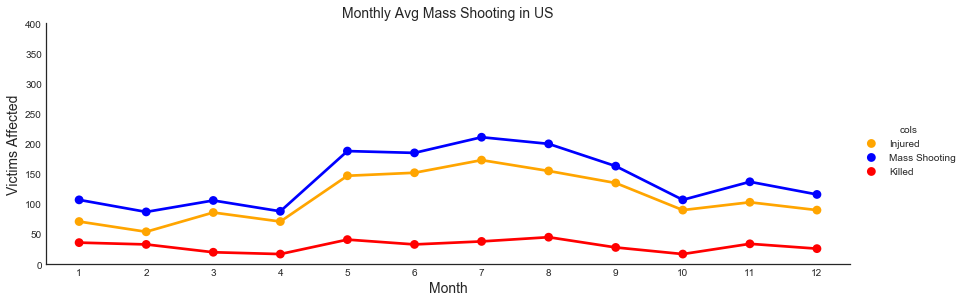

In [171]:
sns.factorplot(x = 'Month', y='vals', hue = 'cols', data= mass2, aspect = 3, palette={'Injured':'orange','Mass Shooting':'blue','Killed':'red'})
plt.ylabel('Victims Affected', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.title('Monthly Avg Mass Shooting in US',fontsize=14)
plt.ylim(0,400)
plt.show()

<a id='2.2Explanation'></a>
#### 2.2 Explanation:
The above chart gives an exaggerated effect of the mass shooting, killed and injured victims data aggregated monthly. Since the above argued claim is related to the daily mass shooting the above visualization creates a deceptive visualization for the audience which deviates from the argument in question. 

The use of color of red of 'Killed Victims' shows that there were far less people killed which is an effect of the mass shooting which minimizes the mass shooting effect on people. Since the original overall argument was to qualify that there is almost every day mass shooting the above visualization deviates from the underlying argument and depicts an almost opposite view of the data.

In [204]:
display(HTML("<table><tr><td><img src='mass_shooting_calendar.png'></td><td><img src='MassDecRev.jpg'></td></tr></table>"))

,


<a id='2.2Final Comparison'></a>
#### 2.2 Comparison:
When compared with the original verison the difference of opinion amongst audience is even more clearer because the mass shooting trend can be seen monthly along with the victims injured and killed statistics creates a deceptive visualization which is exactly opposite to stated argument in the originial visualization.

<a id='2.3Claim'></a>
<a id='2.3Dataset Ref'></a>
#### 2.3 Claim: Support for gun ownership has sharply increased since the early 2000s

Dataset - http://www.people-press.org/2017/06/22/public-views-about-guns/#total

<a id='2.3Comparison'></a>
#### 2.3 Comparison between Original Visualization and Earlier Version

In [205]:
display(HTML("<table><tr><td><img src='gun_control_public_opinion.png'></td><td><img src='Gun1.jpg'></td></tr></table>"))

,


<a id='2.3Critique'></a>
#### 2.3 Critique:
This is a deceptive version because instead of a focusing on bi-yearly data it shows the data for the all the number of years data which gives a slightly different picture of the facts. The above graph states that even if the gun ownership support has increased it has decreased in the following years showing a trend. 

The use of scale in the above deceptive verison presents the same data in a very different light stating that there are almost equal number of people against gun ownership and in support of gun onwership. However the above deceptive visualization can be improved by redefining the axis to improve the deception and the title can also be included.

<a id='2.3Making Of'></a>
#### 2.3 Making of deceptive version

Loading the dataset

In [174]:
control = pd.read_excel("ControlRights.xlsx")

In [175]:
control.head(2)

,Date,Total rights,Total control
0,12/5/93,35,57
1,5/16/99,30,65


Convert data type for data visualization

In [176]:
control['Date'] = pd.to_datetime(control['Date'])

In [177]:
control['Year']=control['Date'].apply(lambda x:int(x.year))

Aggregating data per year and calculating Sum per column

In [178]:
cgrp = control.groupby('Year').agg({'Total rights':'sum','Total control':'sum'})

In [179]:
cgrp.head(2)

,Total rights,Total control
Year,,
1993,35,57
1999,63,127


Resetting index

In [180]:
cgrp.reset_index('Year', inplace = True)

Data Wrangling for Data Visualization

In [181]:
protect = cgrp[['Year','Total rights']]

In [182]:
protect['Category'] = 'Support Gun Onwership'

Renaming Columns for Data Visualization

In [183]:
protect.rename(columns = {'Total rights':'People'}, inplace = True)

In [184]:
protect.head(2)

,Year,People,Category
0,1993,35,Support Gun Onwership
1,1999,63,Support Gun Onwership


Data Wrangling for Data Visualization

In [185]:
tight = cgrp[['Year','Total control']]

In [186]:
tight['Category'] = 'Against Gun Ownership'

Renaming Columns for Data Visualization

In [187]:
tight.rename(columns = {'Total control':'People'}, inplace = True)

In [188]:
tight.head(2)

,Year,People,Category
0,1993,57,Against Gun Ownership
1,1999,127,Against Gun Ownership


In [189]:
vote = protect.append(tight)

In [190]:
vote.head(2)

,Year,People,Category
0,1993,35,Support Gun Onwership
1,1999,63,Support Gun Onwership


<a id='2.3Final Revised'></a>
#### 2.3 Final Revised Deceptive

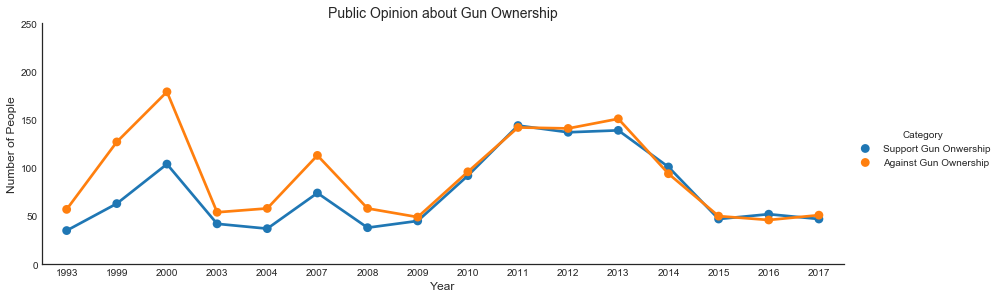

In [191]:
sns.factorplot(x = 'Year', y = 'People', data = vote, hue = 'Category' ,aspect = 3 )
plt.ylabel('Number of People', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.title('Public Opinion about Gun Ownership',fontsize=14)
plt.ylim(0,250)
plt.show()

<a id='2.3Explanation'></a>
#### 2.3 Explanation: 
The above revised deceptive version clearly deceives the audience because instead of maginifying the data where gun ownership opinion is closely divided the data shows the actual trend of people's opinion about gun ownership over a period of time. Hence the intended purpose is opposite of what the argument stated in the claim above resulting in a deceptive version . Including title "Public Opinion about Gun Ownership" depicts that the visualization was created with the purpose to keep an open mind of the intended audience.

In [206]:
display(HTML("<table><tr><td><img src='gun_control_public_opinion.png'></td><td><img src='GunDec2.jpg'></td></tr></table>"))

,


<a id='2.3Final Comparison'></a>
#### 2.3 Comparison:
The above deceptive version when compared with the original version is an exact opposite version of the same dataset because of two reasons.

First, because of the redefined yearly scale instead of focusing on data where there is almost equal number of against and for gun ownership the data shows the yearly trend of public opinion on the matter.
Second, because of redefined y-scale the graph potrays a deceptive view of the data which looks like almost half of the people where involved in the poll which deviates from the stated argument which is the exact intent of the deceptive visualization.